In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import accuracy_score

In [2]:
directory = '/mnt/home/jbielecki1/NEMA/10000000/'
groupsNames = ["Threshold", "FP", "TP", "TN", "FN"]

In [3]:
# XGB Data
xgbGroupsFileName = 'XGBGroupPerThreshold1000d6'
xgbGroups = pd.read_csv(directory + xgbGroupsFileName, names = groupsNames, sep = "\t")
xgbFP = np.array(xgbGroups['FP'])
xgbTP = np.array(xgbGroups['TP'])
xgbTN = np.array(xgbGroups['TN'])
xgbFN = np.array(xgbGroups['FN'])
xgbTPR = xgbTP/(xgbTP + xgbFN)
xgbFPR = xgbFP/(xgbTN + xgbFP)
xgbPPV = xgbTP/(xgbTP + xgbFP)
xgbPos = (xgbTP + xgbFP)/(xgbTP + xgbFP + xgbTN + xgbFN)
xgbRatio = xgbTPR/xgbFPR
xgbModelFileName = 'XGB/xgbEstimators1000Depth6'
xgbModel = pickle.load(open(directory + xgbModelFileName, 'rb'))

/mnt/home/jbielecki1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/mnt/home/jbielecki1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [29]:
# ADA Data
adaMaxDepth = 6
adaGroupsFileName = 'ADAGroupPerThreshold1000d' + str(adaMaxDepth)
adaGroups = pd.read_csv(directory + adaGroupsFileName, names = groupsNames, sep = "\t")
adaFP = np.array(adaGroups['FP'])
adaTP = np.array(adaGroups['TP'])
adaTN = np.array(adaGroups['TN'])
adaFN = np.array(adaGroups['FN'])
adaTPR = adaTP/(adaTP + adaFN)
adaFPR = adaFP/(adaTN + adaFP)
adaPPV = adaTP/(adaTP + adaFP)
adaPos = (adaTP + adaFP)/(adaTP + adaFP + adaTN + adaFN)
adaRatio = adaTPR/adaFPR
adaModelFileName = 'ADA/adaEstimators1000Depth' + str(adaMaxDepth)
adaModel = pickle.load(open(directory + adaModelFileName, 'rb'))

/mnt/home/jbielecki1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/mnt/home/jbielecki1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/mnt/home/jbielecki1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [4]:
X_test = pickle.load(open(directory + 'xTest', 'rb'))
y_test = pickle.load(open(directory + 'yTest', 'rb'))
class_test = y_test[["class"]].values
y_test = y_test[['newClass']].values

In [30]:
ada_y_pred_prob = adaModel.predict_proba(X_test)[:,1]
ada_y_pred = ada_y_pred_prob > 0.5
ada_accuracy = accuracy_score(ada_y_pred, np.array(y_test))

In [5]:
feature_names = ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'vol1', 'vol2', 'e1', 'e2', 'dt', 'rX1', 'rY1', 'rZ1', 'volD', 'lorL', 'deg3D', 'deg2D', 'rL', 'eSum']
X_test.columns = ["f" + str(x) for x in range(20)]
xgb_y_pred_prob = xgbModel.predict_proba(X_test)[:,1]
X_test.columns = feature_names
xgb_y_pred = xgb_y_pred_prob > 0.5
xgb_accuracy = accuracy_score(xgb_y_pred, np.array(y_test))

In [6]:
pPsOrginalPositive = X_test[y_test > 0]
pPsOrginalNegative = X_test[y_test == 0]

In [31]:
# ADA groups
adaPPsPredictedPositive = X_test[ada_y_pred == 1]
adaPPsPredictedNegative = X_test[ada_y_pred == 0]
adaWorkFP = len(pd.merge(adaPPsPredictedPositive,pPsOrginalNegative, how='inner'))
adaWorkTP = len(pd.merge(adaPPsPredictedPositive,pPsOrginalPositive, how='inner'))
adaWorkTN = len(pd.merge(adaPPsPredictedNegative,pPsOrginalNegative, how='inner'))
adaWorkFN = len(pd.merge(adaPPsPredictedNegative,pPsOrginalPositive, how='inner'))

In [7]:
# XGB groups
xgbPPsPredictedPositive = X_test[xgb_y_pred == 1]
xgbPPsPredictedNegative = X_test[xgb_y_pred == 0]
xgbWorkFP = len(pd.merge(xgbPPsPredictedPositive,pPsOrginalNegative, how='inner'))
xgbWorkTP = len(pd.merge(xgbPPsPredictedPositive,pPsOrginalPositive, how='inner'))
xgbWorkTN = len(pd.merge(xgbPPsPredictedNegative,pPsOrginalNegative, how='inner'))
xgbWorkFN = len(pd.merge(xgbPPsPredictedNegative,pPsOrginalPositive, how='inner'))

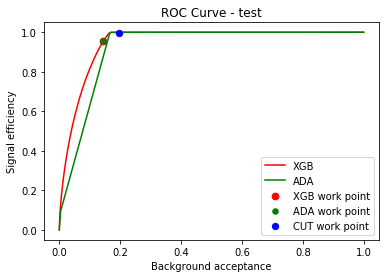

In [33]:
plt.clf()
plt.scatter(
    xgbWorkFP/(xgbWorkTN + xgbWorkFP), xgbWorkTP/(xgbWorkTP + xgbWorkFN), 
    color = 'red', s = 45, label = "XGB work point", zorder = 2
)
plt.scatter(
    adaWorkFP/(adaWorkTN + adaWorkFP), adaWorkTP/(adaWorkTP + adaWorkFN), 
    color = 'green', s = 30, label = "ADA work point", zorder = 2
)
plt.scatter(0.1968, 0.9948, color = 'blue', s = 40, label = "CUT work point", zorder = 2)
plt.plot(xgbFPR, xgbTPR, label = "XGB", color = 'red', zorder = 1)
plt.plot(adaFPR, adaTPR, label = "ADA", color = 'green', zorder = 1)
plt.title("ROC Curve - test")
plt.legend(loc = "lower right")
plt.xlabel("Background acceptance")
plt.ylabel("Signal efficiency")
plt.show()

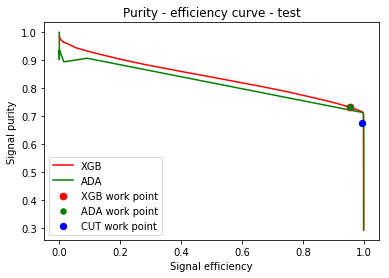

In [32]:
plt.clf()
plt.scatter(
    xgbWorkTP/(xgbWorkTP + xgbWorkFN), xgbWorkTP/(xgbWorkTP + xgbWorkFP), 
    color = 'red', s = 45, label = "XGB work point", zorder = 2
)
plt.scatter(
    adaWorkTP/(adaWorkTP + adaWorkFN), adaWorkTP/(adaWorkTP + adaWorkFP), 
    color = 'green', s = 30, label = "ADA work point", zorder = 2
)
plt.scatter(0.9948, 0.6758, color = 'blue', s = 40, label = "CUT work point", zorder = 2)
plt.plot(xgbTPR[:100], xgbPPV[:100], label = "XGB", color = 'red', zorder = 1)
plt.plot(adaTPR[:100], adaPPV[:100], label = "ADA", color = 'green', zorder = 1)
plt.xlabel("Signal efficiency")
plt.ylabel("Signal purity")
plt.legend(loc = "lower left")
plt.title("Purity - efficiency curve - test")
plt.show()

NameError: name 'adaGroups' is not defined

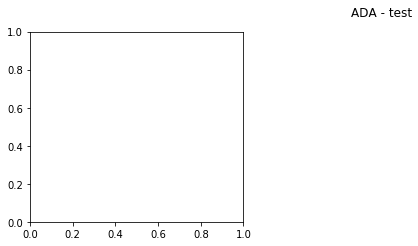

In [20]:
plt.clf()
figAda = plt.gcf()
figAda.set_size_inches(13, 3.5)
figAda.suptitle("ADA - test")
ax1 = plt.subplot(1,3,1)
ax1.plot(np.array(adaGroups['Threshold'])[:97], adaRatio[:97], label = "TPR/FPR")
ax1.plot(np.array(adaGroups['Threshold'])[:97], adaPos[:97]*20, label = "(FP+TP)/(FP+TP+FN+TN) x20")
ax1.set_xlabel("Threshold")
ax1.legend()
ax2 = plt.subplot(1,3,2)
ax2.set_yscale('log')
ax2.hist(ada_y_pred_prob[(class_test == 1)[:,0]], bins = 40, color = 'green', alpha = 0.3, label = "True")
ax2.hist(ada_y_pred_prob[(class_test != 1)[:,0]], bins = 40, color = 'red', alpha = 0.3, label = "False")
ax2.set_xlabel("Probabilities")
ax2.set_ylabel("#")
ax2.legend()
ax3 = plt.subplot(1,3,3)
ax3.set_yscale('log')
ax3.hist(ada_y_pred_prob[(class_test == 2)[:,0]], bins = 40, color = 'green', alpha = 0.3, label = "Class 2")
ax3.hist(ada_y_pred_prob[(class_test == 3)[:,0]], bins = 40, color = 'blue', alpha = 0.3, label = "Class 3")
ax3.hist(ada_y_pred_prob[(class_test == 4)[:,0]], bins = 40, color = 'red', alpha = 0.3, label = "Class 4")
ax3.set_xlabel("Probabilities")
ax3.set_ylabel("#")
ax3.legend()
plt.show()

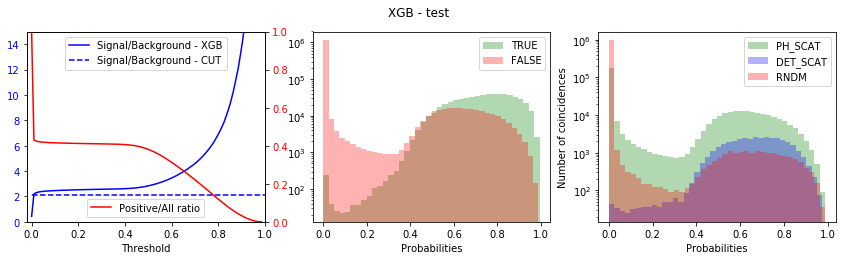

In [11]:
plt.clf()
figAda = plt.gcf()
figAda.set_size_inches(14.5, 3.5)
figAda.suptitle("XGB - test")
ax1 = plt.subplot(1,3,1)
ax1.plot(np.array(xgbGroups['Threshold'])[:100], xgbRatio[:100]*0.3/0.7, label = "Signal/Background - XGB", color = "blue")
ax1.plot([0.0, 1.0], [(99.63/20.13)*0.3/0.7, (99.63/20.13)*0.3/0.7], label = "Signal/Background - CUT", color = "blue", linestyle = '--')
ax1.set_ylim([0, 15])
ax1.set_xlim([-.02, 1.0])
ax1.tick_params(axis='y', labelcolor = "blue")
ax1.set_xlabel("Threshold")
ax12 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax12.plot(np.array(xgbGroups['Threshold'])[:100], xgbPos[:100], label = "Positive/All ratio", color = "red")
ax12.set_ylim([0, 1])
ax12.set_xlabel("Threshold")
ax12.tick_params(axis='y', labelcolor = "red")
ax1.legend(loc = "upper center")
ax12.legend(loc = "lower center")
ax2 = plt.subplot(1,3,2)
ax2.set_yscale('log')
ax2.hist(xgb_y_pred_prob[(class_test == 1)[:,0]], bins = 40, color = 'green', alpha = 0.3, label = "TRUE")
ax2.hist(xgb_y_pred_prob[(class_test != 1)[:,0]], bins = 40, color = 'red', alpha = 0.3, label = "FALSE")
ax2.set_xlabel("Probabilities")
ax2.legend()
ax3 = plt.subplot(1,3,3)
ax3.set_yscale('log')
ax3.hist(xgb_y_pred_prob[(class_test == 2)[:,0]], bins = 40, color = 'green', alpha = 0.3, label = "PH_SCAT")
ax3.hist(xgb_y_pred_prob[(class_test == 3)[:,0]], bins = 40, color = 'blue', alpha = 0.3, label = "DET_SCAT")
ax3.hist(xgb_y_pred_prob[(class_test == 4)[:,0]], bins = 40, color = 'red', alpha = 0.3, label = "RNDM")
ax3.set_xlabel("Probabilities")
ax3.set_ylabel("Number of coincidences")
ax3.legend()
plt.show()